In [2]:
from collections import defaultdict

class ledger:
    def __init__(self, initial_cash):
        self.shares = defaultdict(dict[str, float])
        self.shares["cash"] = initial_cash

    def transaction(self, orig_sym, dest_sym, num_shares, share_price, commision):
        '''trading org sym for num_shares of dest sym'''
        if dest_sym not in self.shares:
            self.shares[dest_sym] = 0
        '''buy or sell shares of a symbol'''
        self.shares[dest_sym] += num_shares
        self.shares[orig_sym] -= num_shares * share_price

    def get_share(self, sym):
        if sym not in self.shares:
            return 0
        return self.shares[sym]

    def cash_equavalent(self, share_prices):
        '''computes the cash equevalent of the shared currently under the account share_prices 
        should be an dictionary with symbol as key and current price as value'''
        cash_eq = 0
        for s in self.shares.keys():
            cash_eq += share_prices[s] * self.shares[s]
        return cash_eq

In [3]:
import numpy as np

In [4]:
data = np.load("data.npz")
close_price = data['arr_0']
label = data['arr_1']
label

array([0, 2, 1, ..., 1, 1, 1])

In [19]:
price = {"cash": 1, "eth": close_price[0]}
account = ledger(1)
cash_eq = []
prev_op = 0
completed_transaction = 0
wins = 0
purchase_price = 0
for i in range(len(label)):
    price["eth"] = close_price[i]
    if(label[i]!=prev_op):
        if label[i]==1:
            account.transaction("cash", "eth", account.get_share("cash")/close_price[i], close_price[i], 0.01)
            prev_op = 1
            purchase_price = close_price[i]

        elif label[i]==2:
            account.transaction("eth", "cash", -account.get_share("eth"), close_price[i], 0.01)
            prev_op = 2
            completed_transaction += 1
            if purchase_price < close_price[i]:
                wins += 1

    cash_eq.append(account.cash_equavalent(price))

/var/folders/8j/hvx2rttd66b5n8drw21z0wv80000gn/T/ipykernel_95887/580189455.py:28: RuntimeWarning: overflow encountered in double_scalars
  cash_eq += share_prices[s] * self.shares[s]
/var/folders/8j/hvx2rttd66b5n8drw21z0wv80000gn/T/ipykernel_95887/580189455.py:16: RuntimeWarning: overflow encountered in double_scalars
  self.shares[orig_sym] -= num_shares * share_price
/var/folders/8j/hvx2rttd66b5n8drw21z0wv80000gn/T/ipykernel_95887/580189455.py:28: RuntimeWarning: invalid value encountered in double_scalars
  cash_eq += share_prices[s] * self.shares[s]
/var/folders/8j/hvx2rttd66b5n8drw21z0wv80000gn/T/ipykernel_95887/580189455.py:15: RuntimeWarning: invalid value encountered in double_scalars
  self.shares[dest_sym] += num_shares
/var/folders/8j/hvx2rttd66b5n8drw21z0wv80000gn/T/ipykernel_95887/580189455.py:16: RuntimeWarning: invalid value encountered in double_scalars
  self.shares[orig_sym] -= num_shares * share_price


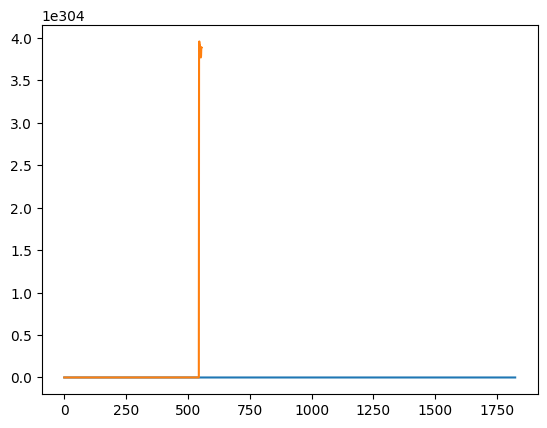

In [17]:
import matplotlib.pyplot as plt
plt.plot(close_price/close_price[0])
plt.plot(cash_eq)

In [92]:
close_price[0]

8007.315871773924

In [95]:
print("SMA ROI ", cash_eq[len(cash_eq)-1], "market ROI", close_price[len(close_price)-1]/close_price[0])
print("completed transactions", completed_transaction, "win rate ", wins)

SMA ROI  76.84864051369152 market ROI 3.7478627346193263
completed transactions 277 win rate  111
